# Regresión lineal

Vamos a explorar la forma matricial de la regresión lineal y encontrar los valores $\beta$

In [18]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

Supongamos que estamos analizando la relación entre la experiencia (en años) y el salario (en miles de pesos) y añadimos una segunda variable independiente: nivel de educación (escala de 1 a 5)

In [20]:
X = np.array([
    [1, 1, 2],   # [Intercepto, Años de experiencia, Nivel de educación]
    [1, 2, 1],
    [1, 3, 4],
    [1, 4, 2],
    [1, 5, 5],
    [1, 6, 3],
    [1, 7, 4],
    [1, 8, 2],
    [1, 9, 5],
    [1, 10, 3]
])

y = np.array([35, 40, 45, 50, 60, 65, 70, 75, 80, 85])  # Salarios en miles de dólares

En python, podemos utilizar el operador @ de manera equivalente a np.matmul() para multiplicar matrices

In [24]:
# Cálculo de beta_hat
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ y
beta_hat = XtX_inv @ XtY

print("Coeficientes estimados:")
print(beta_hat)

Coeficientes estimados:
[28.15381282  5.65034662  0.40944541]


In [40]:
beta_hat

array([28.15381282,  5.65034662,  0.40944541])

In [38]:
print("X -> ", X.shape)
print("Beta -> ", beta_hat.shape)
print("y -> ", (X @ beta_hat).shape)

X ->  (10, 3)
Beta ->  (3,)
y ->  (10,)


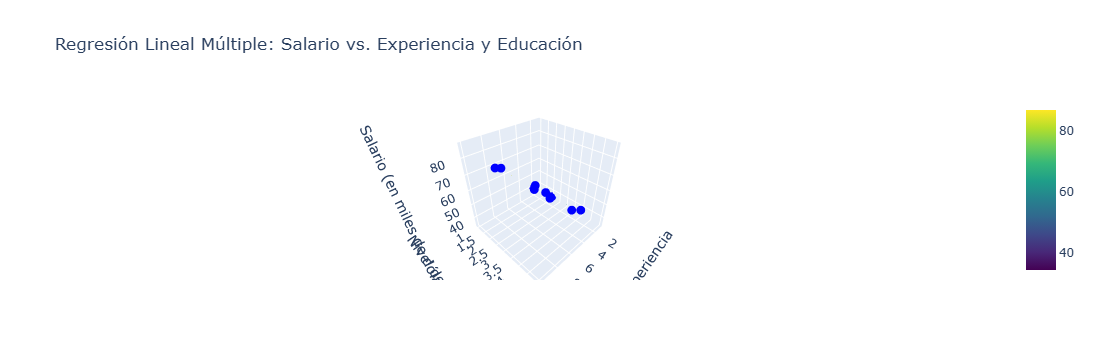

In [30]:
# Crear una malla para las variables independientes
experience_range = np.linspace(X[:,1].min(), X[:,1].max(), 10)
education_range = np.linspace(X[:,2].min(), X[:,2].max(), 10)
experience_grid, education_grid = np.meshgrid(experience_range, education_range)
ones = np.ones(experience_grid.shape)
X_grid = np.stack([ones, experience_grid, education_grid], axis=2)
y_pred_grid = np.sum(X_grid * beta_hat, axis=2)

# Crear figura
fig = go.Figure()

# Añadir puntos de datos
fig.add_trace(go.Scatter3d(
    x=X[:,1],  # Años de experiencia
    y=X[:,2],  # Nivel de educación
    z=y,       # Salario
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Datos Observados'
))

# Añadir superficie del modelo
fig.add_trace(go.Surface(
    x=experience_range,
    y=education_range,
    z=y_pred_grid,
    opacity=0.5,
    colorscale='Viridis',
    name='Plano de Regresión'
))

# Configurar ejes
fig.update_layout(
    title='Regresión Lineal Múltiple: Salario vs. Experiencia y Educación',
    scene=dict(
        xaxis_title='Años de Experiencia',
        yaxis_title='Nivel de Educación',
        zaxis_title='Salario (en miles de dólares)'
    )
)

fig.show()
